In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# plt.rcParams["font.family"] = "Times New Roman"

from os.path import join

sample_path = '../../raw_data/depr_evm/norma 3min/Antipova rest 22-10.raw'

In [2]:
import mne

In [80]:
sample = mne.io.read_raw_egi(sample_path, preload=True)

Reading EGI header from ../../raw_data/depr_evm/norma 3min/Antipova rest 22-10.raw...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {eyeo} ...
Reading 0 ... 119999  =      0.000 ...   239.998 secs...


In [81]:
channels_to_use = [
    't6',
    't4',
    'o1',
    'f8',
    'p4',
    'c4',
    't3',
    'f7',
    'f3',
    'o2',
    'f4',
    'c3',
    'p3',
    't5',
    'cz',
    'fp1',
    'fp2',
    'pz',
    'fz'
]

In [82]:
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

# create Info object to store info
info = mne.io.meas_info.create_info(ten_twenty_montage.ch_names, sfreq=256, ch_types="eeg")
# using temporary RawArray to apply mongage to info
mne.io.RawArray(np.zeros((len(ten_twenty_montage.ch_names), 1)), info, copy=None).set_montage(ten_twenty_montage)

# pick channels
channels_to_use_ = [ch for ch in info.ch_names if ch.lower() in channels_to_use]
info.pick_channels(channels_to_use_);

# get positions
_, pos, _, ch_names, _, _, _ = mne.viz.topomap._prepare_topomap_plot(info, 'eeg');

Creating RawArray with float64 data, n_channels=94, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


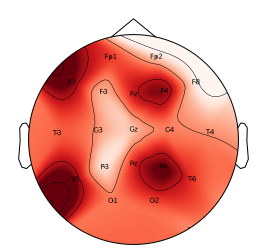

(<matplotlib.image.AxesImage at 0x7fce4b63fe90>,
 <matplotlib.contour.QuadContourSet at 0x7fce4b64a610>)

In [83]:
mne.viz.plot_topomap(np.random.rand((pos.shape[0])), pos, names=ch_names, show_names=True)